In [1]:
import os
os.chdir('..')
print(f'Current working directory is {os.getcwd()}')

Current working directory is C:\Users\Gubbz\Documents\NSS\NSS_Projects\accre-pumpkin-pie


In [3]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [5]:
jobs = pd.read_csv("data/fullsample.csv")
jobs.head(5)

,JOBID,STATE,BEGIN,END,REQMEM,USEDMEM,REQTIME,USEDTIME,NODES,CPUS,PARTITION,EXITCODE
0,30616928,RUNNING,2021-07-31T22:15:00,Unknown,2048Mn,0,10:04:00,67-22:14:22,1,1,production,0:0
1,30853133,COMPLETED,2021-08-06T11:36:09,2021-09-05T11:36:32,262144Mn,20604.62M,30-00:00:00,30-00:00:23,1,1,cgw-platypus,0:0
2,30858137,COMPLETED,2021-08-06T19:04:39,2021-09-05T19:04:53,204800Mn,57553.77M,30-00:00:00,30-00:00:14,1,32,cgw-tbi01,0:0
3,30935078,COMPLETED,2021-08-09T16:52:51,2021-09-07T20:52:55,65536Mn,20577.96M,29-04:00:00,29-04:00:04,1,8,cgw-platypus,0:0
4,31364111_2,COMPLETED,2021-08-17T07:45:07,2021-09-10T16:45:24,16384Mn,9733.43M,24-09:00:00,24-09:00:17,1,1,production,0:0


In [7]:
jobs = pd.read_csv("data/fullsample.csv", usecols=['JOBID','STATE','BEGIN','END','EXITCODE','USEDMEM'])

In [9]:
jobs_filtered = jobs[(jobs['STATE'] == 'COMPLETED') | (jobs['STATE'] == 'FAILED')].copy()

In [15]:
jobs_filtered['BEGIN'] = jobs_filtered['BEGIN'].str.replace('T', ' ')
jobs_filtered['BEGIN'] = pd.to_datetime(jobs_filtered['BEGIN'], format = "%Y-%m-%d %H:%M:%S")
jobs_filtered.head(5)

,JOBID,STATE,BEGIN,END,USEDMEM,EXITCODE
1,30853133,COMPLETED,2021-08-06 11:36:09,2021-09-05 11:36:32,20604.62M,0:0
2,30858137,COMPLETED,2021-08-06 19:04:39,2021-09-05 19:04:53,57553.77M,0:0
3,30935078,COMPLETED,2021-08-09 16:52:51,2021-09-07 20:52:55,20577.96M,0:0
4,31364111_2,COMPLETED,2021-08-17 07:45:07,2021-09-10 16:45:24,9733.43M,0:0
5,31364111_3,COMPLETED,2021-08-17 07:45:07,2021-09-06 16:17:34,9708.04M,0:0


In [16]:
# High failures seen for 9204 between 2020-12-02 and 2021-01-01
start_date_high = pd.to_datetime('2020-12-02').date()
end_time_high = pd.to_datetime('2020-12-09').date()

high_failures_df = jobs_filtered[(jobs_filtered['BEGIN'].dt.date >= start_date_high) & (jobs_filtered['BEGIN'].dt.date <= end_time_high)].reset_index(drop=True)

In [29]:
date_high = pd.to_datetime('2020-12-04').date()
high_failures_day_df = jobs_filtered[jobs_filtered['BEGIN'].dt.date == date_high]

In [ ]:
start_date_low = pd.to_datetime('2021-08-21').date()
end_time_low = pd.to_datetime('2021-08-28').date()

low_failures_df = jobs_filtered[(jobs_filtered['BEGIN'].dt.date >= start_date_low) & (jobs_filtered['BEGIN'].dt.date <= end_time_low)].reset_index(drop=True)

In [31]:
date_low = pd.to_datetime('2021-03-23').date()
low_failures_day_df = jobs_filtered[jobs_filtered['BEGIN'].dt.date == date_low]

In [27]:
display(high_failures_df.shape)
display(low_failures_df.shape)

(140664, 6)

(256362, 6)

In [33]:
display(high_failures_day_df.shape)
display(low_failures_day_df.shape)

(16171, 6)

(20392, 6)

In [35]:
typical_day_count = jobs_filtered.groupby([jobs_filtered['BEGIN'].dt.date, jobs_filtered['BEGIN'].dt.hour]).agg({'JOBID':'count'})
typical_day_count.index.names = ['Date', 'Hour']

In [37]:
typical_day_count

JOBID
Date       Hour       
2020-10-01 0       773
           1      1135
           2      1038
           3      1107
           4      1390
...                ...
2021-10-07 16        8
           17        8
           18        8
           19        8
           20        6

[8921 rows x 1 columns]

In [39]:
typical_day_count.describe()

,JOBID
count,8921.000000
mean,827.132608
std,1210.425794
min,3.000000
25%,207.000000
50%,474.000000
75%,951.000000
max,13671.000000


<Axes: xlabel='JOBID', ylabel='Count'>

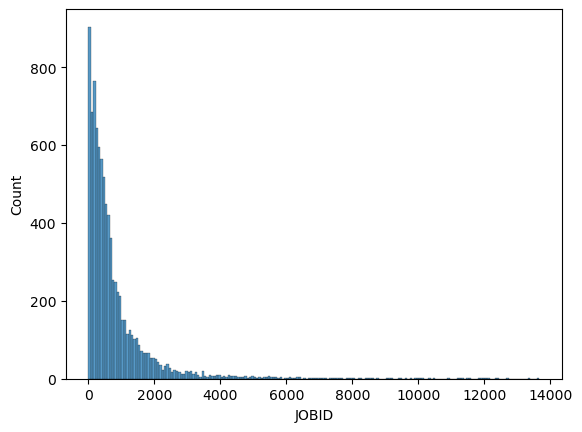

In [41]:
sns.histplot(data = typical_day_count, x='JOBID')

In [59]:
typical_day_count.loc[datetime.date(2020,12,4)].mean()

JOBID    673.791667
dtype: float64

In [57]:
typical_day_count.loc[datetime.date(2021,3,23)].mean()

JOBID    849.666667
dtype: float64